In [22]:
import pickle
import numpy as np

# Previous version: 2023
# with open("./results/params_search_ppo.pickle", 'rb') as f:
#     result = pickle.load(f)
    
# Current version: 2024
with open("./results/params_search_PPO_solid.pkl", 'rb') as f:
    result = pickle.load(f)
    
tau = [comp['tau'] for comp in result['state']]
b_limit = result['beta_limit']
q_limit = result['q_limit']
n_limit = result['n_limit']
f_limit = result['f_limit']
i_limit = result['i_limit']
tbr = np.array([result['state'][idx]['TBR'] for idx in range(len(tau))])
T = np.array([result['control'][idx]['T_avg'] for idx in range(len(tau))])

tau = np.array(tau)
b_limit = np.array(b_limit)
q_limit = np.array(q_limit)
n_limit = np.array(n_limit)
f_limit = np.array(f_limit)
i_limit = np.array(i_limit)

# 2023 version
indices = np.where(((b_limit == 1) * (q_limit == 1) * (n_limit == 1) * (f_limit == 1) * (tbr >= 1) * (tbr < 2)) == 1)
print("indices : ", indices[0])

indices :  [ 846 7013]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


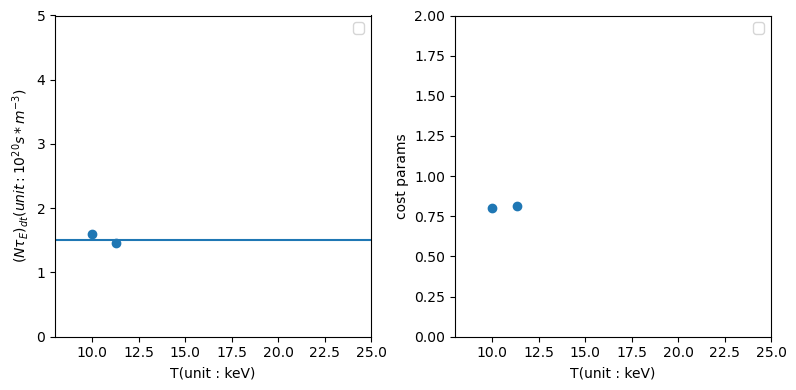

In [23]:
# n*tau*T graph
from src.lawson import Lawson
import matplotlib.pyplot as plt

lawson = Lawson()

# Lawson-criteria
T = np.array([result['control'][idx]['T_avg'] for idx in indices[0]])
n_tau = np.array([result['state'][idx]['n_tau'] for idx in indices[0]])
n_tau_T = T * n_tau

# Cost paramter
cost = np.array([result['state'][idx]['cost'] for idx in indices[0]])

fig, axes = plt.subplots(1,2,figsize = (8,4))
axes = axes.ravel()
ax = axes[0]
ax.scatter(T, n_tau)
ax.set_xlabel("T(unit : keV)")
ax.set_ylabel("$(N\\tau_E)_{dt}(unit:10^{20}s * m^{-3})$")
ax.axhline(1.5, 0, 1)
ax.set_xlim([8,25])
ax.set_ylim([0,5])
ax.legend()

ax = axes[1]
ax.scatter(T, cost)
ax.set_xlabel("T(unit : keV)")
ax.set_ylabel("cost params")
ax.set_xlim([8,25])
ax.set_ylim([0,2])
ax.legend()

fig.tight_layout()

In [24]:
arg_min = np.argmin(cost)
arg_min = indices[0][arg_min]

for key in result['state'][arg_min].keys():
    print("{} : {:.3f}".format(key, result['state'][arg_min][key]))
    
for key in result['control'][arg_min].keys():
    print("{} : {:.3f}".format(key, result['control'][arg_min][key]))
    

R : 3.854
a : 0.857
blanket_thickness : 1.064
coil_thickness : 1.363
n : 2.296
TBR : 1.699
beta : 3.825
tau : 0.694
Ip : 7.392
q : 2.259
f_BS : 0.531
Q_parallel : 387.981
n_g : 3.208
q_kink : 2.000
beta_troyon : 3.969
f_NC : 0.852
n_tau : 1.594
n_tau_lower : 4.108
cost : 0.803
betan : 3.500
k : 1.900
epsilon : 4.500
electric_power : 502951538.086
T_avg : 10.000
B0 : 16.000
H : 1.300
armour_thickness : 0.050
RF_recirculating_rate : 0.200


### Gridsearch case

In [14]:
import pickle
import numpy as np

with open("./results/params_search_gridsearch_solid.pkl", 'rb') as f:
    result = pickle.load(f)
    
tau = [comp['tau'] for comp in result['state']]
b_limit = result['beta_limit']
q_limit = result['q_limit']
n_limit = result['n_limit']
f_limit = result['f_limit']
i_limit = result['i_limit']
tbr = np.array([result['state'][idx]['TBR'] for idx in range(len(tau))])
T = np.array([result['control'][idx]['T_avg'] for idx in range(len(tau))])

tau = np.array(tau)
b_limit = np.array(b_limit)
q_limit = np.array(q_limit)
n_limit = np.array(n_limit)
f_limit = np.array(f_limit)
i_limit = np.array(i_limit)

indices = np.where(((b_limit == 1) * (q_limit == 1) * (n_limit == 1) * (f_limit == 1) * (tbr >= 1) * (tbr < 2)) == 1)
print("indices : ", indices[0])
print("# of cases : {}".format(len(indices[0])))

indices :  [   2    3    9 ... 9997 9998 9999]
# of cases : 1623


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


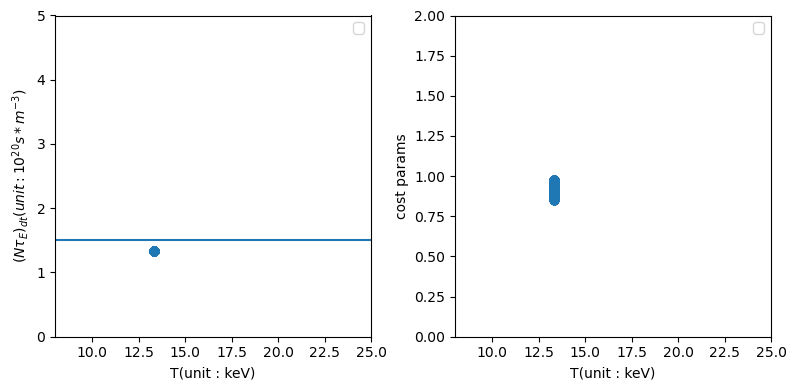

In [15]:
# n*tau*T graph
from src.lawson import Lawson
import matplotlib.pyplot as plt

lawson = Lawson()

# Lawson-criteria
T = np.array([result['control'][idx]['T_avg'] for idx in indices[0]])
n_tau = np.array([result['state'][idx]['n_tau'] for idx in indices[0]])
n_tau_T = T * n_tau

# Cost paramter
cost = np.array([result['state'][idx]['cost'] for idx in indices[0]])

fig, axes = plt.subplots(1,2,figsize = (8,4))
axes = axes.ravel()
ax = axes[0]
ax.scatter(T, n_tau)
ax.set_xlabel("T(unit : keV)")
ax.set_ylabel("$(N\\tau_E)_{dt}(unit:10^{20}s * m^{-3})$")
ax.axhline(1.5, 0, 1)
ax.set_xlim([8,25])
ax.set_ylim([0,5])
ax.legend()

ax = axes[1]
ax.scatter(T, cost)
ax.set_xlabel("T(unit : keV)")
ax.set_ylabel("cost params")
ax.set_xlim([8,25])
ax.set_ylim([0,2])
ax.legend()

fig.tight_layout()

In [16]:
arg_min = np.argmin(cost)
arg_min = indices[0][arg_min]

for key in result['state'][arg_min].keys():
    print("{} : {:.3f}".format(key, result['state'][arg_min][key]))
    
for key in result['control'][arg_min].keys():
    print("{} : {:.3f}".format(key, result['control'][arg_min][key]))
    

R : 6.143
a : 1.365
blanket_thickness : 1.064
coil_thickness : 0.886
n : 1.441
TBR : 1.388
beta : 3.459
tau : 0.925
Ip : 12.331
q : 2.076
f_BS : 0.074
Q_parallel : 594.780
n_g : 2.106
q_kink : 2.000
beta_troyon : 3.496
f_NC : 0.651
n_tau : 1.333
n_tau_lower : 2.664
cost : 0.851
betan : 2.833
k : 1.900
epsilon : 4.500
electric_power : 1277777777.778
T_avg : 13.333
B0 : 12.444
H : 1.000
armour_thickness : 0.050
RF_recirculating_rate : 0.189


### Reward shape engineering

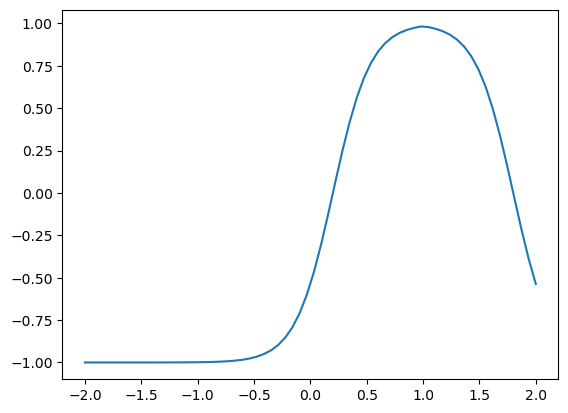

In [15]:
import math

def compute_sigmoid(x):
    return math.tanh(x)

def reward_func(x, scale, a, x_min, x_max):
    xn = x / scale
    xnl = x_min / scale
    xrl = x_max / scale
    
    if xn < xrl:
        reward = compute_sigmoid(a * (xn - xnl))
    else:
        reward = compute_sigmoid(a * (2 * xrl - xnl - xn))
        
    return reward

x = np.linspace(-2,2,64)
y = np.array([reward_func(t, 1, 3, 0.2, 1.0) for t in x])

plt.plot(x,y)

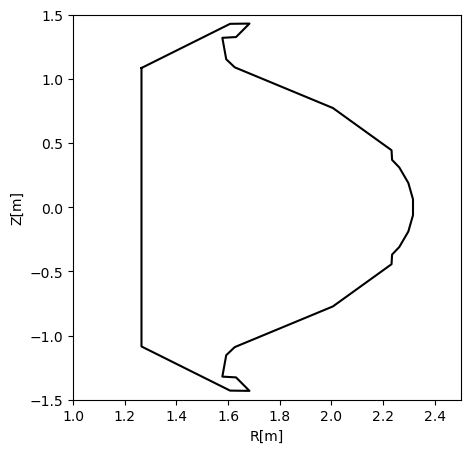

In [2]:
# Draw KSTAR-configuration
import matplotlib.pyplot as plt
from matplotlib.pyplot import Axes

PF_coils = {
    "P1L":[0.57, -0.25],
    "P1U":[0.57, 0.25],
    "P2L":[0.57, -0.7],
    "P2U":[0.57, 0.7],
    "P3L":[0.57, -1.00],
    "P3U":[0.57, 1.00],
    "P4L":[0.57, -1.26],
    "P4U":[0.57, 1.26],
    "P5L":[1.09, -2.30],
    "P5U":[1.09, 2.30],
    "P6L":[3.09, -1.92],
    "P6U":[3.09, 1.92],
    "P7L":[3.73, -0.98],
    "P7U":[3.73, 0.98],
}

import numpy as np

limiter_shape = np.array([
    [ 1.265,  1.085],
    [ 1.608,  1.429],
    [ 1.683,  1.431],
    [ 1.631,  1.326],
    [ 1.578,  1.32 ],
    [ 1.593,  1.153],
    [ 1.626,  1.09 ],
    [ 2.006,  0.773],
    [ 2.233,  0.444],
    [ 2.235,  0.369],
    [ 2.263,  0.31 ],
    [ 2.298,  0.189],
    [ 2.316,  0.062],
    [ 2.316, -0.062],
    [ 2.298, -0.189],
    [ 2.263, -0.31 ],
    [ 2.235, -0.369],
    [ 2.233, -0.444],
    [ 2.006, -0.773],
    [ 1.626, -1.09 ],
    [ 1.593, -1.153],
    [ 1.578, -1.32 ],
    [ 1.631, -1.326],
    [ 1.683, -1.431],
    [ 1.608, -1.429],
    [ 1.265, -1.085],
    [ 1.265,  1.085]
])

def draw_KSTAR_limiter(ax:Axes):
    ax.plot(limiter_shape[:,0], limiter_shape[:,1], 'black')
    ax.set_xlim([1.0, 2.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_xlabel('R[m]')
    ax.set_ylabel('Z[m]')
    return ax

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot()
ax = draw_KSTAR_limiter(ax)

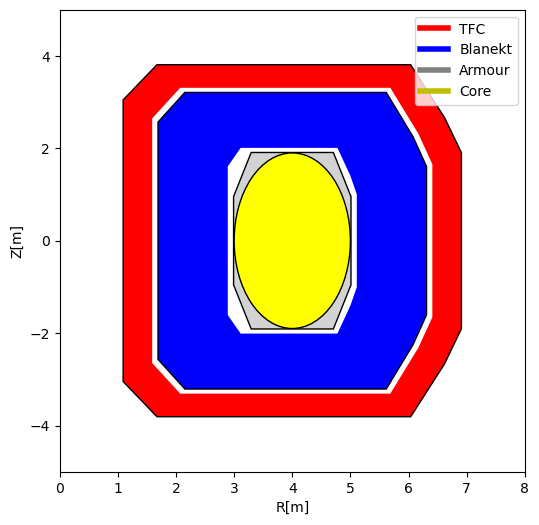

In [36]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.pyplot import Axes
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import numpy as np


def draw_core(ax:Axes, R : float, a : float, b : float):
    ax.add_patch(
        patches.Ellipse(
            xy = (R, 0), # xy xy coordinates of ellipse centre.
            width = 2 * a,   # width Total length (diameter) of horizontal axis.
            height = 2 * b, # height Total length (diameter) of vertical axis.
            angle = 0, # angle Rotation in degrees anti-clockwise. 0 by default
            edgecolor = 'black',
            linestyle = 'solid', 
            fill = True,
            facecolor = 'yellow',
            )
    )
    
    return ax

def draw_armour(ax:Axes, R : float, a : float, b : float):
    
    ax.add_patch(
        patches.Polygon(
            np.array([
                [R-a, -0.5*b],
                [R-0.7*a, -b], 
                [R+0.7*a, -b], 
                [R+a, -0.5 * b], 
                [R+a, 0.5*b], 
                [R+0.7*a, b], 
                [R-0.7*a, b],
                [R-a, 0.5*b]
                ]), # xy
            closed=True,
            edgecolor = 'black',
            linestyle = 'solid', 
            fill = True,
            facecolor = 'lightgray',
        )
    )    
    
    return ax

def draw_blanket(ax:Axes, R : float, a_inner : float, b_inner : float, a_outer : float, b_outer : float):
    ax.add_patch(
        patches.Polygon(
            np.array([
                [R-a_outer*1.0, -b_outer * 0.8], 
                [R-a_outer*0.8, -b_outer * 1.0], 
                [R+a_outer*0.7, -b_outer * 1.0], 
                [R+a_outer*0.9, -b_outer * 0.7], 
                [R+a_outer*1.0, -b_outer * 0.5], 
                [R+a_outer*1.0, b_outer * 0.5], 
                [R+a_outer*0.9, b_outer * 0.7], 
                [R+a_outer*0.7, b_outer * 1.0], 
                [R-a_outer*0.8, b_outer * 1.0], 
                [R-a_outer*1.0, b_outer * 0.8]
            ]),
            closed=True,
            edgecolor = 'black',
            linestyle = 'solid', 
            fill = True,
            facecolor = 'blue',
        )
    )    
    
    ax.add_patch(
        patches.Polygon(
            np.array([
                [R-a_inner*1.0, -b_inner * 0.8], 
                [R-a_inner*0.8, -b_inner * 1.0], 
                [R+a_inner*0.7, -b_inner * 1.0], 
                [R+a_inner*0.9, -b_inner * 0.7], 
                [R+a_inner*1.0, -b_inner * 0.5], 
                [R+a_inner*1.0, b_inner * 0.5], 
                [R+a_inner*0.9, b_inner * 0.7], 
                [R+a_inner*0.7, b_inner * 1.0], 
                [R-a_inner*0.8, b_inner * 1.0], 
                [R-a_inner*1.0, b_inner * 0.8]
                ]),
            closed=True,
            edgecolor = 'none',
            linestyle = 'solid', 
            fill = True,
            facecolor = 'white',
        )
    )    
    
    return ax

def draw_coil(ax:Axes,R : float, a_inner : float, b_inner : float, a_outer : float, b_outer : float):
       
    ax.add_patch(
        patches.Polygon(
            np.array([
                [R-a_outer*1.0, -b_outer * 0.8], 
                [R-a_outer*0.8, -b_outer * 1.0], 
                [R+a_outer*0.7, -b_outer * 1.0], 
                [R+a_outer*0.9, -b_outer * 0.7], 
                [R+a_outer*1.0, -b_outer * 0.5], 
                [R+a_outer*1.0, b_outer * 0.5], 
                [R+a_outer*0.9, b_outer * 0.7], 
                [R+a_outer*0.7, b_outer * 1.0], 
                [R-a_outer*0.8, b_outer * 1.0], 
                [R-a_outer*1.0, b_outer * 0.8]
            ]),
            closed=True,
            edgecolor = 'black',
            linestyle = 'solid', 
            fill = True,
            facecolor = 'red',
        )
    )    
    
    ax.add_patch(
        patches.Polygon(
            np.array([
                [R-a_inner*1.0, -b_inner * 0.8], 
                [R-a_inner*0.8, -b_inner * 1.0], 
                [R+a_inner*0.7, -b_inner * 1.0], 
                [R+a_inner*0.9, -b_inner * 0.7], 
                [R+a_inner*1.0, -b_inner * 0.5], 
                [R+a_inner*1.0, b_inner * 0.5], 
                [R+a_inner*0.9, b_inner * 0.7], 
                [R+a_inner*0.7, b_inner * 1.0], 
                [R-a_inner*0.8, b_inner * 1.0], 
                [R-a_inner*1.0, b_inner * 0.8]
                ]),
            closed=True,
            edgecolor = 'none',
            linestyle = 'solid', 
            fill = True,
            facecolor = 'white',
        )
    )    
    
    return ax

def plot_design_poloidal(
    R:float,
    a:float,
    b:float,
    d_armour:float,
    d_blanket:float,
    d_coil:float,
    x_min:float = 0,
    x_max:float = 10,
    y_min:float = -8,
    y_max:float = 8,
    ):
    
    a_armour = a + d_armour
    b_armour = b + d_armour

    a_blanket = a_armour + 0.1
    b_blanket = b_armour + 0.1

    a_coil = a_blanket + d_blanket + 0.1
    b_coil = b_blanket + d_blanket + 0.1

    fig = plt.figure(figsize = (6, 6))
    ax = fig.add_subplot()

    ax = draw_coil(ax, R, a_coil, b_coil, a_coil + d_coil, b_coil + d_coil)
    ax = draw_blanket(ax, R, a_blanket, b_blanket, a_blanket + d_blanket, b_blanket + d_blanket)
    ax = draw_armour(ax, R, a_armour, b_armour)
    ax = draw_core(ax, R, a, b)

    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    ax.set_xlabel('R[m]')
    ax.set_ylabel('Z[m]')
    
    legend_elements = [
        Line2D([0],[0], color = 'r', lw = 4, label = "TFC"),
        Line2D([0],[0], color = 'b', lw = 4, label = "Blanekt"),
        Line2D([0],[0], color = 'gray', lw = 4, label = "Armour"),
        Line2D([0],[0], color = 'y', lw = 4, label = "Core"),
        ]
    ax.legend(handles = legend_elements, loc ="upper right")
    return ax
    
k = 1.9
a = 1.0
b = k*a
R = 4.0
d_armour = 0.01
d_blanket = 1.2
d_coil = 0.5

ax = plot_design_poloidal(R,a,b,d_armour,d_blanket, d_coil, 0, 8, -5, 5)